<a href="https://colab.research.google.com/github/harry-zhao78/colab/blob/master/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet
!pip install pystan

In [ ]:
#data cleaning and preparation
import os
import datetime


import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf




# multivariate lstm example
from numpy import array
from numpy import hstack
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler



mpl.rcParams['figure.figsize'] = (30, 16)
mpl.rcParams['axes.grid'] = False



In [ ]:
from google.colab import files

data_to_load = files.upload()

Saving SH5mins.csv to SH5mins.csv


In [ ]:
df = pd.read_csv(
  "SH5mins.csv", 
  parse_dates=['time'], 

)
df["target"]=df.close.shift(-1)
df=df.drop(df.tail(1).index) # drop last n rows
df

df["y"] = df.target
df["ds"]=df.time
df=df.drop(columns=['target', 'time'])


In [ ]:
df

,open,high,low,close,volume,BIAS,BOLL,DMI,EXPMA,HV,KDJ,MA5,MACD,RSI,y,ds
0,3279.1700,3278.2100,3272.6500,3277.6600,1890435500,0.0329,3270.7435,32.9343,3275.6561,0.0007,69.6404,3276.9360,3.5700,59.0115,3276.3300,2017-08-08 09:35:00
1,3276.8800,3277.5900,3275.3500,3276.3300,1103144400,-0.0156,3271.4992,29.6872,3275.7598,0.0007,62.8923,3276.9280,3.3593,51.7740,3276.8100,2017-08-08 09:40:00
2,3275.5400,3276.9100,3273.3400,3276.8100,987933100,-0.0105,3272.1881,25.2482,3275.9214,0.0006,60.5411,3277.3160,3.1943,54.2063,3277.5400,2017-08-08 09:45:00
3,3277.1600,3278.8400,3276.5600,3277.5400,940794200,0.0085,3272.7904,31.1438,3276.1704,0.0006,62.2400,3277.5600,3.0868,58.0662,3276.6400,2017-08-08 09:50:00
4,3277.3600,3277.6200,3276.0300,3276.6400,806916200,-0.0127,3273.2712,28.8405,3276.2426,0.0003,59.3457,3276.9960,2.8956,51.6281,3278.5100,2017-08-08 09:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35082,3364.6801,3368.1010,3364.6273,3366.3909,573475500,0.3707,3343.4290,40.8299,3355.2848,0.0009,81.8141,3364.6599,5.1481,77.5673,3364.7490,2020-08-07 14:35:00
35083,3366.2987,3368.0790,3364.0010,3364.7490,613301600,0.2499,3343.7283,37.4877,3356.7408,0.0008,79.8179,3364.6382,5.5218,71.2397,3354.0883,2020-08-07 14:40:00
35084,3363.6902,3363.9042,3353.9315,3354.0883,751752500,-0.1053,3343.6542,29.9771,3356.3327,0.0016,63.3506,3362.3184,4.9012,43.5556,3357.1462,2020-08-07 14:45:00
35085,3354.0142,3359.1518,3353.9831,3357.1462,839851400,-0.0567,3343.6528,26.9953,3356.4579,0.0017,47.9113,3361.3815,4.6030,50.2149,3354.1658,2020-08-07 14:50:00


In [ ]:
from fbprophet import Prophet
m = Prophet()

df_train = df.loc[df["ds"]<"2019-03-21"]
df_test  = df.loc[df["ds"]>="2019-03-21"]


for i in df.columns:
  if i!="y" and i!="ds": 
   m.add_regressor(i)
m.fit(df_train)

forecast = m.predict(df_test.drop(columns="y"))


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,BIAS,BIAS_lower,BIAS_upper,BOLL,BOLL_lower,BOLL_upper,DMI,DMI_lower,DMI_upper,EXPMA,EXPMA_lower,EXPMA_upper,HV,HV_lower,HV_upper,KDJ,KDJ_lower,KDJ_upper,MA5,MA5_lower,MA5_upper,MACD,MACD_lower,MACD_upper,RSI,RSI_lower,RSI_upper,additive_terms,additive_terms_lower,additive_terms_upper,close,close_lower,close_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,high,high_lower,high_upper,low,low_lower,low_upper,open,open_lower,open_upper,volume,volume_lower,volume_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-21 09:35:00,3090.167290,3090.922252,3102.697520,3090.167290,3090.167290,1.415847,1.415847,1.415847,-1.033601,-1.033601,-1.033601,0.078257,0.078257,0.078257,18.122111,18.122111,18.122111,-0.000008,-0.000008,-0.000008,-0.139685,-0.139685,-0.139685,-2.939725,-2.939725,-2.939725,0.355809,0.355809,0.355809,0.481660,0.481660,0.481660,6.475671,6.475671,6.475671,80.956237,80.956237,80.956237,-70.626270,-70.626270,-70.626270,77.798019,77.798019,77.798019,-8.326188,-8.326188,-8.326188,-21.334370,-21.334370,-21.334370,10.669739,10.669739,10.669739,-0.508065,-0.508065,-0.508065,-0.696079,-0.696079,-0.696079,0.0,0.0,0.0,3096.642961
1,2019-03-21 09:40:00,3090.167325,3087.058485,3098.146474,3090.167325,3090.167325,0.553281,0.553281,0.553281,-1.057625,-1.057625,-1.057625,0.038836,0.038836,0.038836,18.379877,18.379877,18.379877,0.000063,0.000063,0.000063,-0.098449,-0.098449,-0.098449,-2.999829,-2.999829,-2.999829,0.365736,0.365736,0.365736,0.175586,0.175586,0.175586,2.192412,2.192412,2.192412,75.072170,75.072170,75.072170,-70.702986,-70.702986,-70.702986,73.593021,73.593021,73.593021,-8.104509,-8.104509,-8.104509,-19.598595,-19.598595,-19.598595,11.099002,11.099002,11.099002,-0.232523,-0.232523,-0.232523,-0.697622,-0.697622,-0.697622,0.0,0.0,0.0,3092.359737
2,2019-03-21 09:45:00,3090.167360,3085.594822,3097.371651,3090.167360,3090.167360,0.472381,0.472381,0.472381,-1.083579,-1.083579,-1.083579,0.023094,0.023094,0.023094,18.629783,18.629783,18.629783,0.000046,0.000046,0.000046,-0.072994,-0.072994,-0.072994,-3.031450,-3.031450,-3.031450,0.373837,0.373837,0.373837,0.197348,0.197348,0.197348,1.041145,1.041145,1.041145,75.855339,75.855339,75.855339,-70.760525,-70.760525,-70.760525,72.500844,72.500844,72.500844,-8.083296,-8.083296,-8.083296,-20.866830,-20.866830,-20.866830,10.281560,10.281560,10.281560,-0.194393,-0.194393,-0.194393,-0.699174,-0.699174,-0.699174,0.0,0.0,0.0,3091.208505
3,2019-03-21 09:50:00,3090.167395,3098.185449,3109.088094,3090.167395,3090.167395,1.504874,1.504874,1.504874,-1.118951,-1.118951,-1.118951,0.035273,0.035273,0.035273,19.289373,19.289373,19.289373,0.000152,0.000152,0.000152,-0.109178,-0.109178,-0.109178,-3.145962,-3.145962,-3.145962,0.438388,0.438388,0.438388,0.412495,0.412495,0.412495,13.407325,13.407325,13.407325,86.891828,86.891828,86.891828,-70.801524,-70.801524,-70.801524,84.909584,84.909584,84.909584,-8.793940,-8.793940,-8.793940,-20.687654,-20.687654,-20.687654,10.410481,10.410481,10.410481,-0.217596,-0.217596,-0.217596,-0.700735,-0.700735,-0.700735,0.0,0.0,0.0,3103.574720
4,2019-03-21 09:55:00,3090.167430,3087.417111,3099.139846,3090.167430,3090.167430,0.292479,0.292479,0.292479,-1.143405,-1.143405,-1.143405,0.013515,0.013515,0.013515,19.454590,19.454590,19.454590,0.000277,0.000277,0.000277,-0.072715,-0.072715,-0.072715,-3.171804,-3.171804,-3.171804,0.429308,0.429308,0.429308,0.072728,0.072728,0.072728,3.008954,3.008954,3.008954,77.215578,77.215578,77.215578,-70.828463,-70.828463,-70.828463,74.539722,74.539722,74.539722,-8.792879,-8.792879,-8.792879,-21.535944,-21.535944,-21.535944,11.956111,11.956111,11.956111,-0.178117,-0.178117,-0.178117,-0.702305,-0.702305,-0.702305,0.0,0.0,0.0,3093.176384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
df_test.shape

(16223, 16)

In [ ]:

error=np.array(df_test.y)-np.array(forecast.yhat)
np.array(df_test.y).shape

(16223,)

In [ ]:

import sklearn.metrics


ytrue=df_test.y
yhat=forecast.yhat

print("sklearn mae：",sklearn.metrics.mean_absolute_error(ytrue,yhat))


sklearn mae： 3.8555302571626235


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


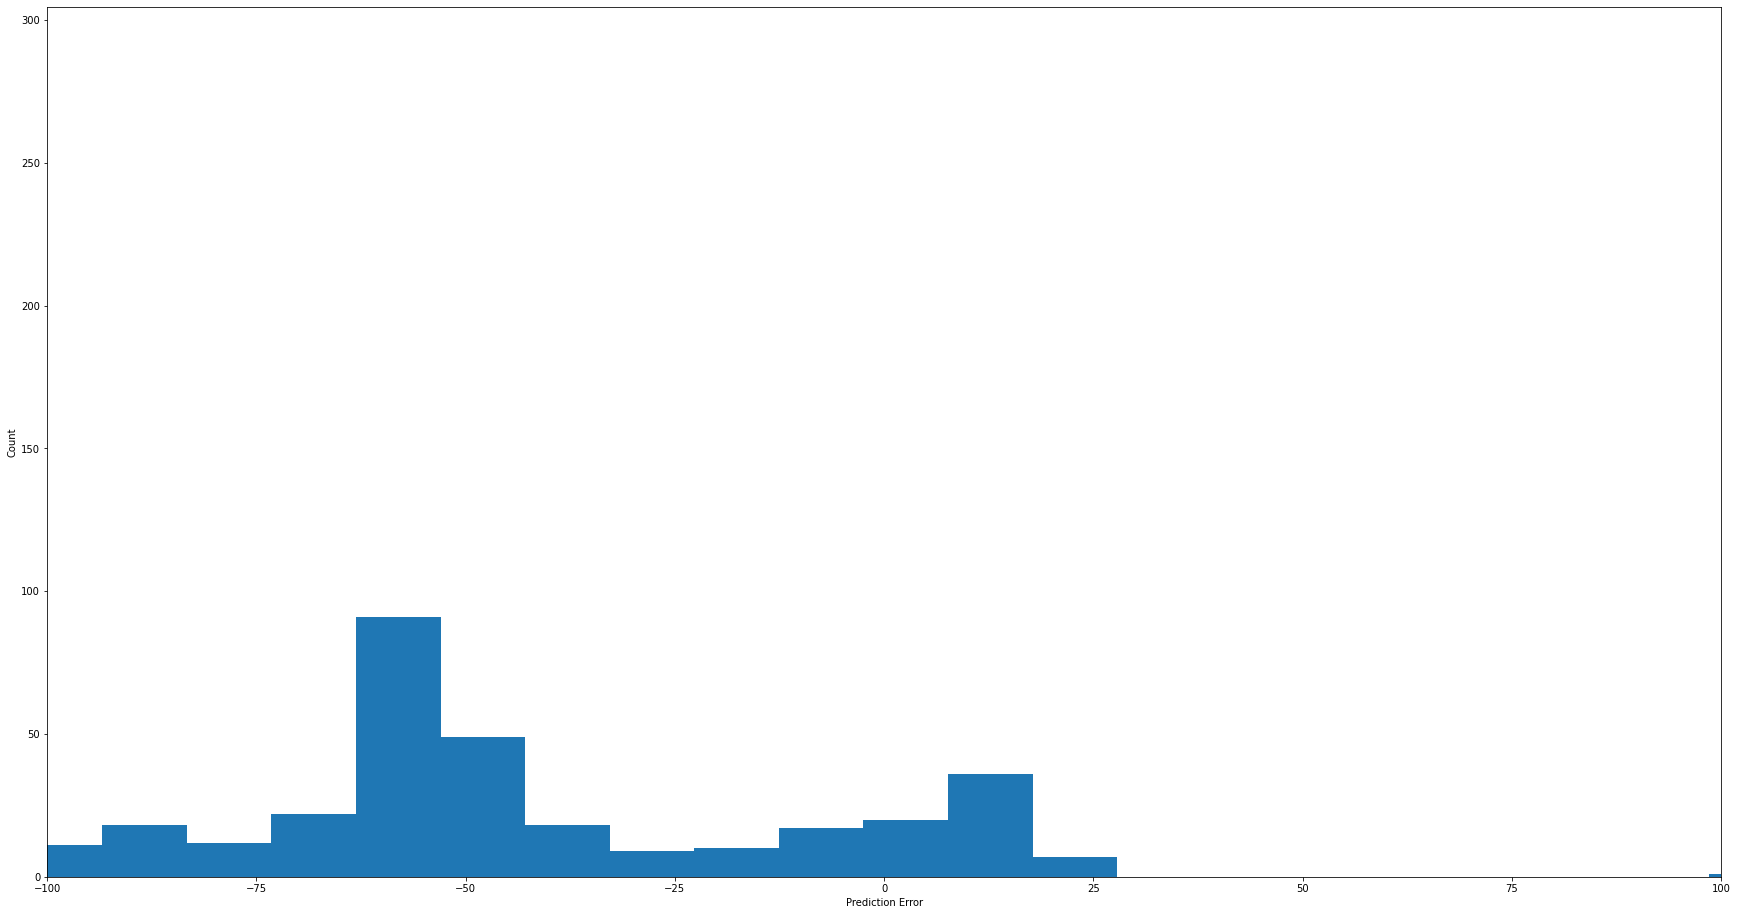

In [ ]:
#single feature


df2=df[["y",'ds']]
df2
from fbprophet import Prophet
m = Prophet()

df_train = df2.loc[df2["ds"]<"2019-03-21"]
df_test  = df2.loc[df2["ds"]>="2019-03-21"]

m.fit(df_train)

forecast = m.predict(df_test.drop(columns="y"))

gene_hist(np.array(df_test.y),np.array(forecast.yhat))

In [ ]:

import sklearn.metrics


ytrue=df_test.y
yhat=forecast.yhat

print("sklearn mae：",sklearn.metrics.mean_absolute_error(ytrue,yhat))

sklearn mae： 927.2013604468256
